# Forecasting for the Exogeneous Variables

This is the optimal model for each exogeneous variable

In [10]:
import warnings
warnings.filterwarnings("ignore")
from utils import *

df = pd.read_csv('dataset.csv', index_col='Month', parse_dates=True,date_parser=lambda x: pd.to_datetime(x, format='%y-%b'))
production = df['Production']
withdrawals = df['Withdrawals']
globalPrice = df['GlobalPrice']
exchangeRate = df['ExchangeRate']
temperature = df['TempMax']
precipitation = df['Precipitation']

In [23]:
# For plotting 

def Plot(actual, forecasted, title):
    plt.figure(figsize=(12,6))
    plt.plot(actual, label='Actual', color='blue')
    plt.plot(forecasted, label='Forecasted', color='red')
    plt.axvline(x=actual.index[-1], color='green', linestyle='--', label='Forecast Start')

    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.grid(True, which='minor', axis='x', linestyle='-', alpha=0.3) 
    plt.grid(True, which='major', axis='x', linestyle='-', alpha=0.7)
    plt.xticks(rotation=45)

    plt.title(title)
    plt.legend()
    plt.show()


# Production

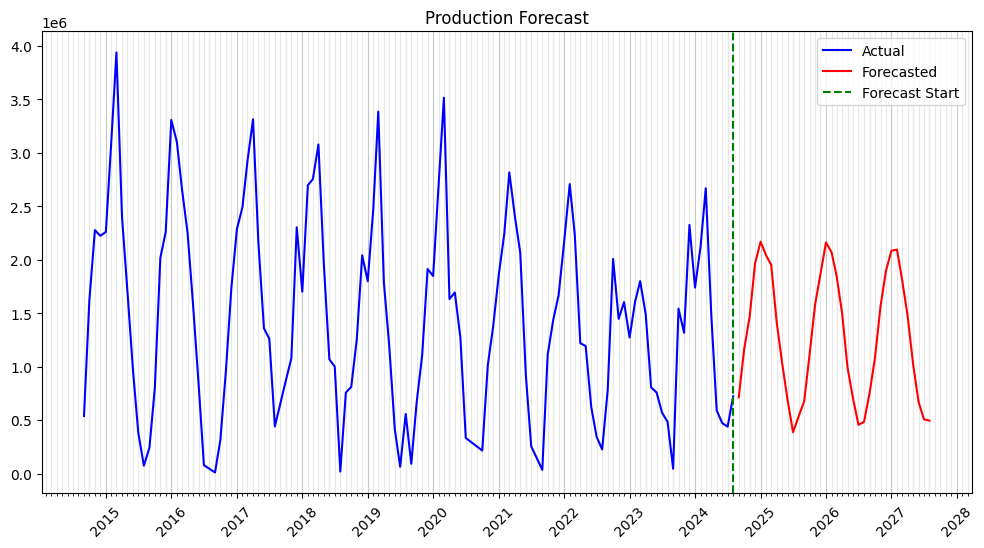

In [24]:
prod_forecast, prod_model = Forecast(production, (4,1,7), 36)

Plot(production, prod_forecast,'Production Forecast')

# Withdrawals

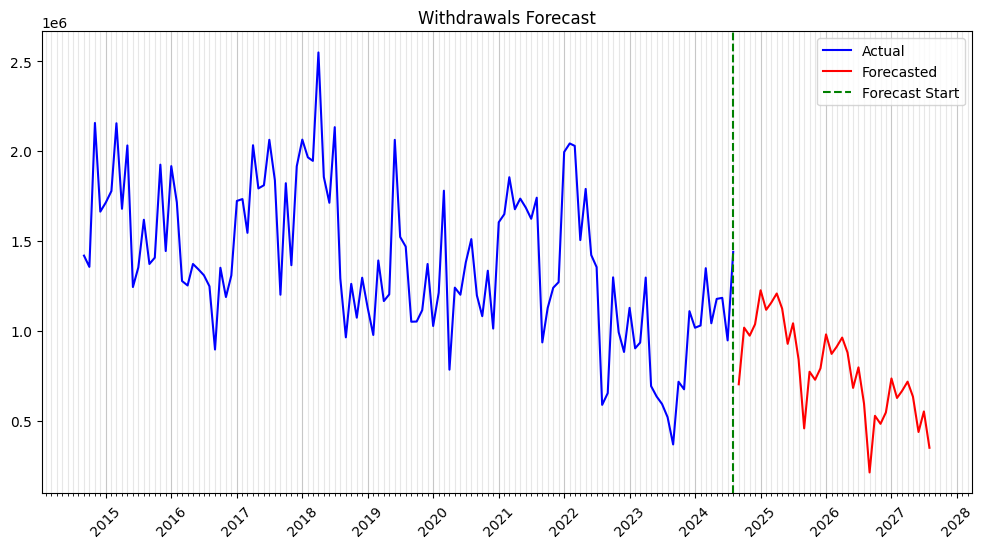

In [25]:
with_forecast = HoltWintersForecast(withdrawals, 36)

Plot(withdrawals, with_forecast, 'Withdrawals Forecast')

# Global Price

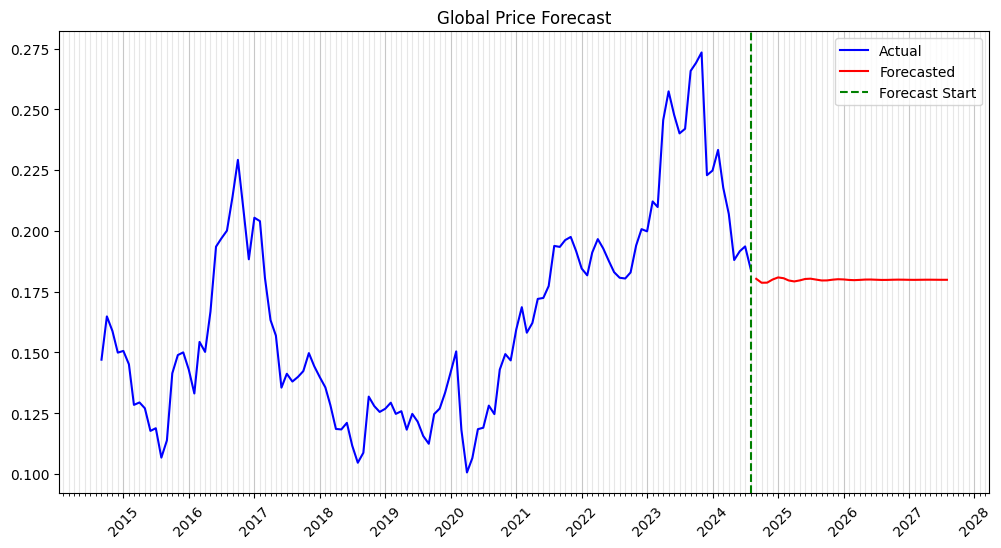

In [26]:
gPrice_forecast, gPrice_model = Forecast(globalPrice, (2,1,3), 36)

Plot(globalPrice, gPrice_forecast, 'Global Price Forecast')

# Exchange Rate

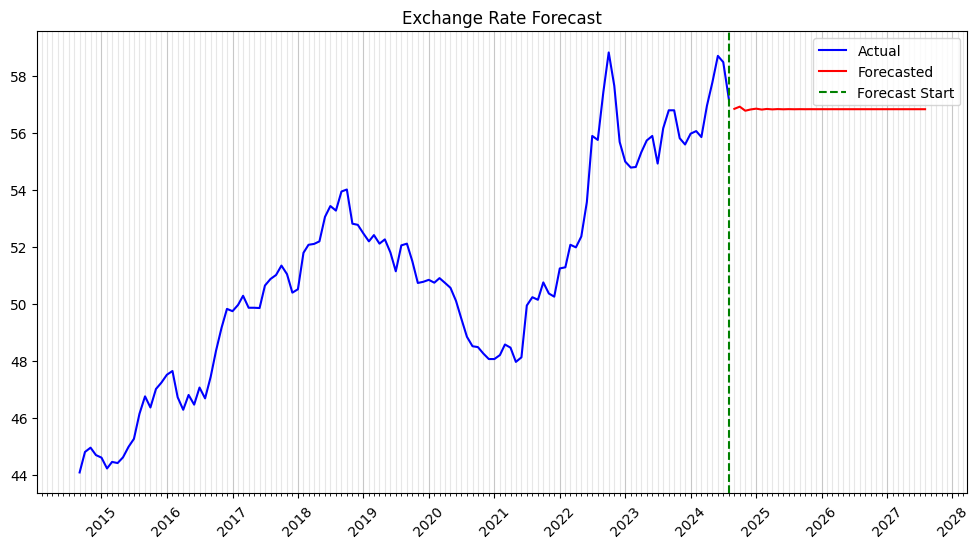

In [27]:
eRate_forecast, eR_model = Forecast(exchangeRate, (1,1,6), 36)

Plot(exchangeRate, eRate_forecast, 'Exchange Rate Forecast')

# Temperature

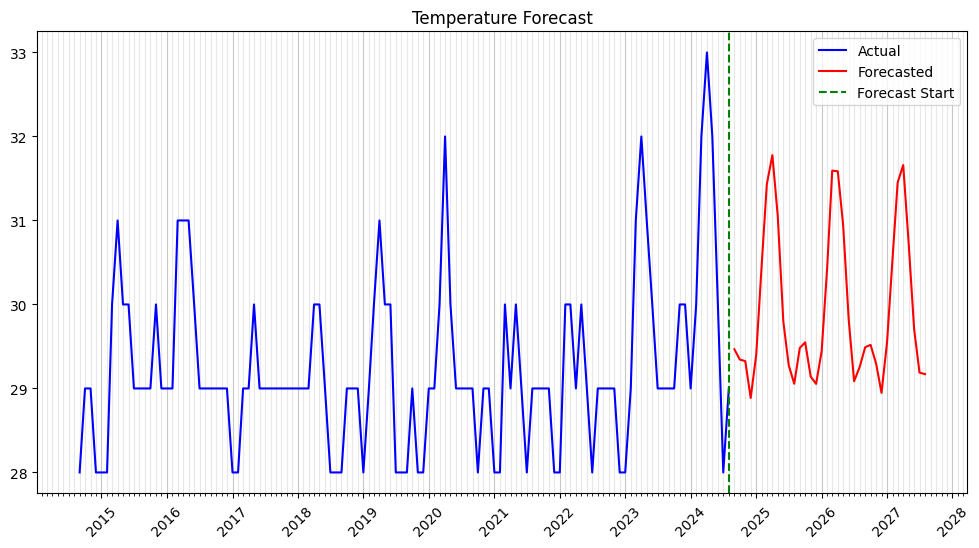

In [28]:
temp_forecast, temp_model = Forecast(temperature, (7,1,8), 36)

Plot(temperature, temp_forecast, 'Temperature Forecast')

# Precipitation

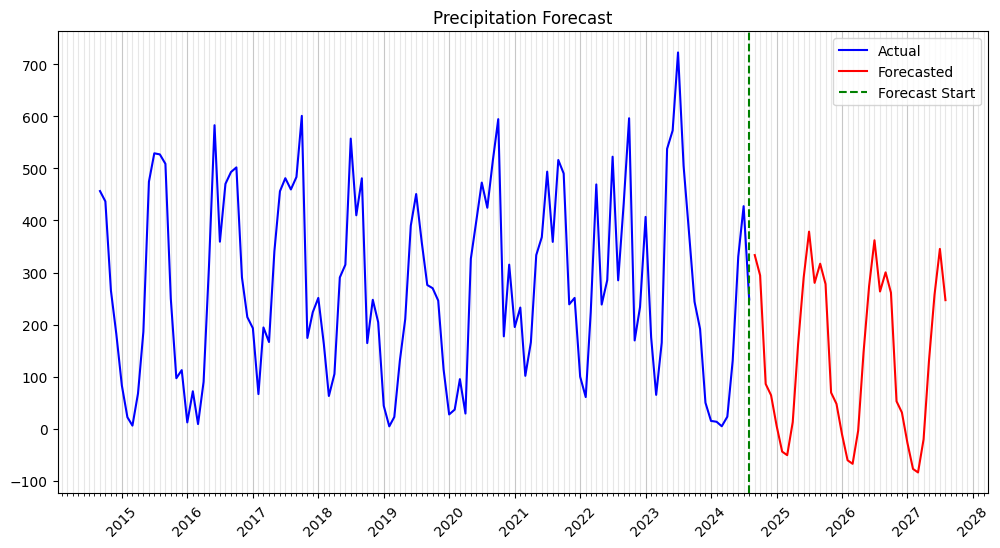

In [29]:
precip_forecast = HoltWintersForecast(precipitation, 36)

Plot(precipitation, precip_forecast, 'Precipitation Forecast')

# Combining the Forecasted results

In [17]:
combined_forecast = pd.DataFrame({
    'Production': prod_forecast,
    'Withdrawals': with_forecast,
    'GlobalPrice': gPrice_forecast,
    'ExchangeRate': eRate_forecast,
    'TempMax': temp_forecast,
    'Precipitation': precip_forecast
})

combined_forecast.to_csv('exogdata.csv', header=True)